In [17]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt
import yfinance as yf

In [10]:
!pip install yfinance


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
tensorboard 2.12.3 requires tensorboard-data-server<0.8.0,>=0.7.0, but you have tensorboard-data-server 0.6.1 which is incompatible.



  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=70bd7fed1a6148d1eaedd3c7a60376dcc3e183db58ec460f7537ae062b39793c
  Stored in directory: c:\users\ppava\appdata\local\pip\cache\wheels\fb\8f\48\21f2805b10ea9f7bba0d72f4a4b353045f50d91cbc7cce1b99
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [2]:
!pip install pandas_datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [24]:
stocks = "AAPL SPY".split()
start = dt.date.today() - dt.timedelta(365)

In [25]:
#stocks = "AAPL"
#start = dt.date.today() - dt.timedelta(365)

# Fetch the data
data = yf.download(stocks, start=start)["Close"]
print(data.head())

[*********************100%***********************]  2 of 2 completed

Ticker                           AAPL         SPY
Date                                             
2023-11-03 00:00:00+00:00  176.649994  434.690002
2023-11-06 00:00:00+00:00  179.229996  435.690002
2023-11-07 00:00:00+00:00  181.820007  436.929993
2023-11-08 00:00:00+00:00  182.889999  437.250000
2023-11-09 00:00:00+00:00  182.410004  433.839996


In [26]:
returns = (np.log(data).diff()).dropna()
returns.head()

Ticker,AAPL,SPY
Date,,
2023-11-06 00:00:00+00:00,0.014500,0.002298
2023-11-07 00:00:00+00:00,0.014347,0.002842
2023-11-08 00:00:00+00:00,0.005868,0.000732
2023-11-09 00:00:00+00:00,-0.002628,-0.007829
2023-11-10 00:00:00+00:00,0.021638,0.015484


In [27]:
sample= returns.sample(60).corr()
sample

Ticker,AAPL,SPY
Ticker,,
AAPL,1.000000,0.577257
SPY,0.577257,1.000000


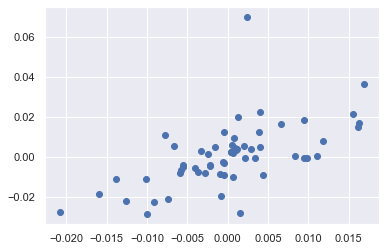

In [28]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['AAPL']);

In [30]:
reg = np.polyfit(sample['SPY'], sample['AAPL'], deg = 1)
reg

array([1.23864278e+00, 4.40760430e-04])

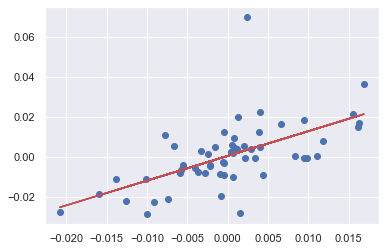

In [32]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['AAPL'])
plt.plot(sample["SPY"], trend, 'r');

# Regression as a Technical Indicator


In [33]:
data = pd.DataFrame(pdr.get_data_yahoo('SPY', start)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/SPY/history?period1=1698998400&period2=1730620799&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'><script>if(window!=window.top){document.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'+new Date().getTime()+\'&_R=\'+encodeURIComponent(document.referrer)+\'&err=404&err_url=\'+\'https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FSPY%2Fhistory%2Findex.html\'+\'" width="0px" height="0px"/>\');}else{window.location.replace(\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FSPY%2Fhistory%2Findex.html\');}</script><noscript><META http-equiv="refresh" content="0;URL=\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FSPY%2Fhistory%2Findex.html\'"></noscript></html>'

In [39]:
# Set up stock symbol and start date
symbol = 'SPY'
start = dt.date.today() - dt.timedelta(365)

# Fetch the data using yfinance
data = yf.download(symbol, start=start)

# Access the "Close" column by specifying both levels of the MultiIndex
data_close = pd.DataFrame(data[('Close', symbol)])

# Add a time column
data_close['time'] = np.arange(1, len(data_close) + 1)

# Rename columns for clarity
data_close.columns = ['Close', 'time']

# Reorder columns and round
data_close = data_close[['time', 'Close']]
data_close = round(data_close, 2)

print(data_close.tail())

[*********************100%***********************]  1 of 1 completed

                           time   Close
Date                                   
2024-10-28 00:00:00+00:00   247  580.83
2024-10-29 00:00:00+00:00   248  581.77
2024-10-30 00:00:00+00:00   249  580.01
2024-10-31 00:00:00+00:00   250  568.64
2024-11-01 00:00:00+00:00   251  571.04


In [41]:
# Perform linear regression on 'time' and 'Close' columns in data_close
reg = np.polyfit(data_close['time'], data_close['Close'], deg=1)
reg


array([  0.51621836, 454.58553084])

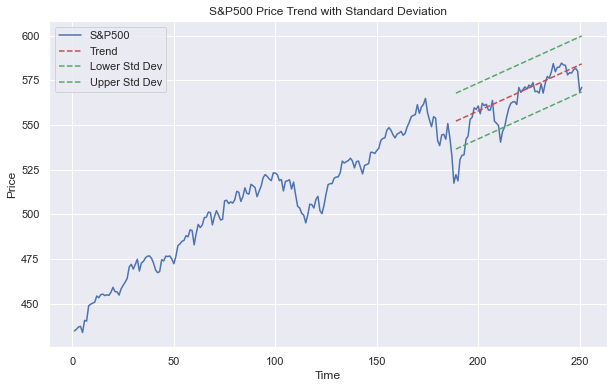

In [43]:
# Calculate trend and standard deviation using data_close
trend = np.polyval(reg, data_close['time'][-63:])  # Use data_close instead of data
std = data_close['Close'][-63:].std()  # Use data_close instead of data

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_close['time'], data_close['Close'], label="S&P500")  # Use data_close for plotting
plt.plot(data_close['time'][-63:], trend, 'r--', label='Trend')  # Trend line
plt.plot(data_close['time'][-63:], trend - std, 'g--', label='Lower Std Dev')  # Lower std deviation
plt.plot(data_close['time'][-63:], trend + std, 'g--', label='Upper Std Dev')  # Upper std deviation

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("S&P500 Price Trend with Standard Deviation")
plt.legend()
plt.show()


In [44]:
predict = np.poly1d(reg)
predict(300)

609.4510379510533

# Simple Scatter Plor with Trend Line


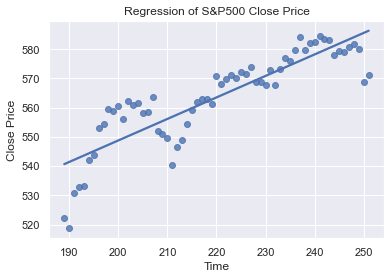

In [46]:
#import seaborn as sb

# Make sure you're using the data_close DataFrame for the regplot
sb.regplot(x='time', y='Close', ci=None, fit_reg=True, data=data_close[-63:])
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Regression of S&P500 Close Price")
plt.show()
